In [1]:
import pandas as pd
import numpy as np

In [7]:
def get_price_data(filename):
    df = pd.read_csv(filename)
    df.drop_duplicates(['PERMCO', 'date'], inplace=True)
    return df.pivot(index='date', columns='PERMNO', values='PRC')

In [8]:
def get_adj_price_data(filename):
    df = pd.read_csv(filename)
    df['adj_prc'] = df['PRC'] / df['CFACPR']
    df.drop_duplicates(['PERMNO', 'date'], inplace=True)
    return df.pivot(index='date', columns='PERMNO', values='adj_prc')

In [9]:
def get_return_data(filename):
    df = pd.read_csv(filename)
    df.drop_duplicates(['PERMCO', 'date'], inplace=True)
    return df.pivot(index='date', columns='PERMNO', values='RET')

In [10]:
files = ['stock_return.csv']
prices = pd.concat([get_price_data(fn) for fn in files])
prices = prices.abs()
prices.head()

MemoryError: 

In [7]:
prices = prices.set_index(pd.to_datetime(prices.index,format='%Y%m%d'))
prices.head()

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,9.6250,15.2500,21.000,0.90625,16.53125,4.625,21.75,22.375,3.8125,33.87500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,9.5000,15.5000,21.375,0.90625,16.25000,5.750,21.75,22.250,3.5625,31.37500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,10.0000,16.0000,22.000,1.06250,16.37500,5.250,22.25,21.500,3.3125,32.40625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,10.0000,16.0000,21.250,1.18750,16.50000,6.000,22.75,21.875,3.5000,35.37500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,10.0625,15.4375,21.250,1.18750,16.25000,6.250,22.50,23.000,3.2500,34.62500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
prices.to_csv('prices.csv')

In [5]:
ret=get_return_data('stock_return.csv')

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
ret.head()

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
19981231,0.000000,0.016667,0.024390,0.115385,-0.001887,0.013699,0.000000,0.011299,0.016667,0.028463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19990104,-0.012987,0.016393,0.017857,0.000000,-0.017013,0.243243,0.000000,-0.005587,-0.065574,-0.073801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19990105,0.052632,0.032258,0.029240,0.172414,0.007692,-0.086957,0.022989,-0.033708,-0.070175,0.032869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19990106,0.000000,0.000000,-0.034091,0.117647,0.007634,0.142857,0.022472,0.017442,0.056604,0.091610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19990107,0.006250,-0.035156,0.000000,0.000000,-0.015152,0.041667,-0.010989,0.051429,-0.071429,-0.021201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ret.to_csv('return.csv')

In [9]:
ret=ret.set_index(pd.to_datetime(ret.index,format='%Y%m%d'))

In [9]:
ret=pd.read_csv('return.csv',index_col='date',dtype=float)

In [10]:
ret=ret.set_index(pd.to_datetime(ret.index.astype('int64'),format='%Y%m%d'))

In [11]:
ret

,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,0.000000,0.016667,0.024390,0.115385,-0.001887,0.013699,0.000000,0.011299,0.016667,0.028463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,-0.012987,0.016393,0.017857,0.000000,-0.017013,0.243243,0.000000,-0.005587,-0.065574,-0.073801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,0.052632,0.032258,0.029240,0.172414,0.007692,-0.086957,0.022989,-0.033708,-0.070175,0.032869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,0.000000,0.000000,-0.034091,0.117647,0.007634,0.142857,0.022472,0.017442,0.056604,0.091610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,0.006250,-0.035156,0.000000,0.000000,-0.015152,0.041667,-0.010989,0.051429,-0.071429,-0.021201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,-0.031056,0.024291,0.017647,0.315789,0.007692,-0.020000,0.000000,-0.065217,0.000000,0.010830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,0.012821,0.043478,-0.005780,0.080000,0.011450,-0.040816,-0.033333,0.000000,0.076923,-0.005357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-12,0.006329,-0.083333,0.023256,-0.037037,0.001887,0.106383,0.011494,0.000000,-0.035714,-0.007181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-13,-0.018868,0.012397,-0.005682,0.000000,0.013183,-0.076923,-0.045455,-0.011628,-0.037037,-0.001808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
weekly_return = ret.resample('W', label='left', loffset='1d',how=lambda x: x.values.sum() )
weekly_return

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1998-12-28,0.000000,0.016667,0.024390,0.115385,-0.001887,0.013699,0.000000,0.011299,0.016667,0.028463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,0.014839,0.037786,0.030653,0.605850,-0.009147,0.320810,0.034472,-0.035641,-0.150574,0.040307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,0.026398,0.001014,0.011827,0.164501,0.037672,-0.010912,-0.061342,0.011766,0.080007,-0.015544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-18,0.015637,-0.039937,0.006102,0.195056,-0.024020,0.068152,0.081742,0.137219,0.141126,0.115652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25,-0.049212,0.030819,0.000098,0.106678,-0.009373,-0.117648,-0.047563,-0.024854,0.096484,0.038825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-01,0.015411,-0.018598,-0.011197,0.041751,-0.049312,-0.056300,-0.081944,-0.020700,0.043253,-0.065955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-08,-0.092498,-0.024862,0.013353,-0.036980,0.016168,0.027815,-0.024839,-0.004508,-0.174974,-0.014084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-15,0.018719,-0.008332,-0.019997,-0.172501,0.004074,-0.010673,-0.012821,-0.058170,-0.267176,-0.070723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-22,-0.027773,-0.042955,0.012432,-0.007179,0.015671,-0.064534,0.000084,-0.050643,-0.134259,-0.042189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
weekly_return.to_csv('weekly_return.csv')

In [20]:
prices=pd.read_csv('prices.csv',index_col='date')

In [21]:
prices

,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,9.6250,15.2500,21.0000,0.90625,16.53125,4.62500,21.7500,22.37500,3.81250,33.87500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,9.5000,15.5000,21.3750,0.90625,16.25000,5.75000,21.7500,22.25000,3.56250,31.37500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,10.0000,16.0000,22.0000,1.06250,16.37500,5.25000,22.2500,21.50000,3.31250,32.40625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,10.0000,16.0000,21.2500,1.18750,16.50000,6.00000,22.7500,21.87500,3.50000,35.37500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,10.0625,15.4375,21.2500,1.18750,16.25000,6.25000,22.5000,23.00000,3.25000,34.62500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,9.7500,15.8125,21.6250,1.56250,16.37500,6.12500,22.5000,21.50000,3.25000,35.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,9.8750,16.5000,21.5000,1.68750,16.56250,5.87500,21.7500,21.50000,3.50000,34.81250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-12,9.9375,15.1250,22.0000,1.62500,16.59375,6.50000,22.0000,21.50000,3.37500,34.56250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-13,9.7500,15.3125,21.8750,1.62500,16.81250,6.00000,21.0000,21.25000,3.25000,34.50000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
first.to_csv('weekly_prices.csv')

In [8]:

weekly_ret=pd.read_csv('weekly_return.csv',index_col='date')


In [4]:
weekly_ret.index

Index(['1999-01-01', '1999-01-06', '1999-01-11', '1999-01-16', '1999-01-21',
       '1999-01-26', '1999-01-31', '1999-02-05', '1999-02-10', '1999-02-15',
       ...
       '2018-11-17', '2018-11-22', '2018-11-27', '2018-12-02', '2018-12-07',
       '2018-12-12', '2018-12-17', '2018-12-22', '2018-12-27', '2019-01-01'],
      dtype='object', name='date', length=1462)

In [34]:
def get_momentum_weights(x, start=52, end=2, percentile=0.1):
    y = x.loc[:,x.iloc[-1].notna()]
    return_52_2 = (y.iloc[-end] - y.iloc[-start])/y.iloc[-start]
    
    mom_winner = return_12_2 >= return_12_2.quantile(1-percentile)
    mom_loser = return_12_2 <= return_12_2.quantile(percentile)   
    
    winner_price = y.iloc[-1][mom_winner]
    loser_price = y.iloc[-1][mom_loser]
    
    std_vol = y.iloc[-start:].std()
    winner_vol = std_vol[mom_winner]   
    loser_vol = std_vol[mom_loser]
#     print(y.iloc[-end-1:].std()[16669])
#     print(y.loc[:,winner_vol.reindex(x.columns)==0])
#     print(y.loc[:, winner_vol==0])
    
    winner_weights = winner_price/winner_vol
    winner_weights = normalize(winner_weights)
    
    loser_weights = loser_price/loser_vol
    loser_weights = normalize(loser_weights)
    
    
    return winner_weights.append(-loser_weights).reindex(x.columns, fill_value=0.0)

In [96]:
def get_non_risk_adj_momentum_weights(x, start=12, end=2, percentile=0.1):
    y = x.loc[:,x.iloc[-1].notna()]
    return_12_2 = (y.iloc[-end] - y.iloc[-start])/y.iloc[-start]
    
    mom_winner = return_12_2 >= return_12_2.quantile(1-percentile)
    mom_loser = return_12_2 <= return_12_2.quantile(percentile)   
    
    winner_price = y.iloc[-1][mom_winner]
    loser_price = y.iloc[-1][mom_loser]
    
    std_vol = y.iloc[-start:].std()
    winner_vol = std_vol[mom_winner]   
    loser_vol = std_vol[mom_loser]
#     print(y.iloc[-end-1:].std()[16669])
#     print(y.loc[:,winner_vol.reindex(x.columns)==0])
#     print(y.loc[:, winner_vol==0])
    
    winner_weights = winner_price
    winner_weights = normalize(winner_weights)
    
    loser_weights = loser_price
    loser_weights = normalize(loser_weights)
    
    
    return winner_weights.append(-loser_weights).reindex(x.columns, fill_value=0.0)

In [174]:
def get_equal_weighted_momentum_weights(x,price, start=52, end=4, percentile=0.1):
    y = x.loc[:,x.iloc[-1].notna()]
    return_52_4 = y[-start: -end].sum()
    
    mom_winner = return_52_4 >= return_52_4.quantile(1-percentile)
    mom_loser = return_52_4 <= return_52_4.quantile(percentile)   
    
    winner_price = price.iloc[-1][mom_winner]
    loser_price = price.iloc[-1][mom_loser]
    
    std_vol = y.iloc[-start:].std()
    winner_vol = std_vol[mom_winner]   
    loser_vol = std_vol[mom_loser]
#     print(y.iloc[-end-1:].std()[16669])
#     print(y.loc[:,winner_vol.reindex(x.columns)==0])
#     print(y.loc[:, winner_vol==0])
    
    winner_weights = winner_price
    winner_weights[:] = 1/len(winner_weights)
    
    loser_weights = loser_price
    loser_weights[:] = 1/len(loser_weights)
    
    
    return winner_weights.append(-loser_weights).reindex(x.columns, fill_value=0.0)

In [16]:
y=weekly_return.loc[:,weekly_return.iloc[-1].notna()]
return_52_4=y[-52:-4].sum()

In [18]:
mom_winner = return_52_4 >= return_52_4.quantile(0.9)

In [19]:
mom_winner

10026    False
10028    False
10032    False
10044    False
10051    False
10065    False
10104    False
10107    False
10113    False
10138    False
10145    False
10158     True
10180    False
10182    False
10200     True
10201    False
10207    False
10220    False
10232    False
10239    False
10252    False
10253    False
10257    False
10258    False
10294    False
10302    False
10308    False
10318    False
10333    False
10355    False
         ...  
93350    False
93352    False
93356     True
93357    False
93368    False
93369     True
93370    False
93371     True
93372    False
93373    False
93374    False
93380    False
93384    False
93393    False
93397    False
93399    False
93401    False
93406    False
93415    False
93416    False
93419    False
93420    False
93422    False
93423    False
93425    False
93426    False
93427     True
93429    False
93434    False
93436    False
Length: 5556, dtype: bool

In [33]:
def normalize(s):
    return s/s.sum()

In [35]:
weights = pd.DataFrame(index=first.index, columns=first.columns)

In [36]:
for i in range(12,len(weights)):
    weights.iloc[i] = get_momentum_weights(first.iloc[i-12:i])
weights

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
weights.to_csv('weights.csv')

In [15]:
weights = pd.read_csv('weights.csv', index_col=0, parse_dates=True)

,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1999-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
portfolio_returns = (weekly_ret.shift(-1)*weights).sum(axis=1)

In [91]:
portfolio_log_ret = portfolio_returns.apply(lambda x : np.log(1+x))
portfolio_log_ret

date
1999-01-04    0.000000
1999-01-11    0.000000
1999-01-18    0.000000
1999-01-25    0.000000
1999-02-01    0.000000
1999-02-08    0.000000
1999-02-15    0.000000
1999-02-22    0.000000
1999-03-01    0.000000
1999-03-08    0.000000
1999-03-15    0.000000
1999-03-22    0.000000
1999-03-29    0.024303
1999-04-05    0.032642
1999-04-12   -0.040413
1999-04-19    0.001446
1999-04-26   -0.007941
1999-05-03   -0.017334
1999-05-10   -0.013408
1999-05-17   -0.028578
1999-05-24   -0.014702
1999-05-31    0.016642
1999-06-07   -0.008014
1999-06-14    0.003213
1999-06-21   -0.001120
1999-06-28   -0.004690
1999-07-05    0.000844
1999-07-12    0.004408
1999-07-19   -0.007698
1999-07-26    0.023814
                ...   
2018-06-11    0.020835
2018-06-18   -0.009776
2018-06-25    0.009369
2018-07-02    0.008719
2018-07-09    0.000948
2018-07-16    0.004874
2018-07-23   -0.032104
2018-07-30    0.028132
2018-08-06    0.024927
2018-08-13    0.017479
2018-08-20   -0.005193
2018-08-27    0.008205
2018-0

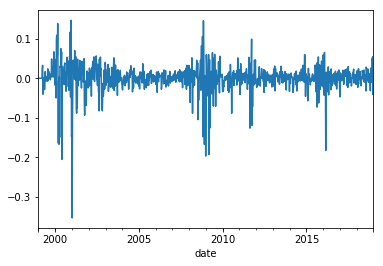

In [93]:
portfolio_log_ret.plot.line()

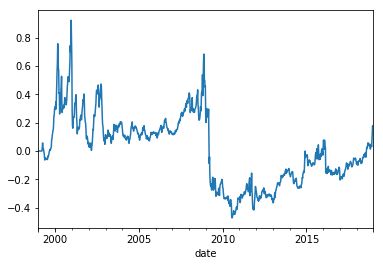

In [158]:
portfolio_log_ret.cumsum().plot.line()

In [97]:
non_risk_adj_weights = pd.DataFrame(index=first.index, columns=first.columns)
for i in range(12,len(non_risk_adj_weights)):
    non_risk_adj_weights.iloc[i] = get_non_risk_adj_momentum_weights(first.iloc[i-12:i])
non_risk_adj_weights

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


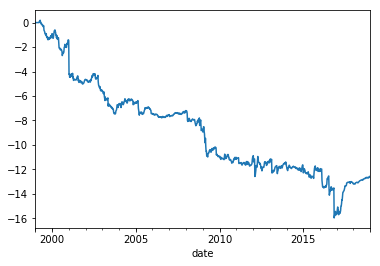

In [163]:
non_risk_adj_pf_returns = (weekly_ret.shift(-1)*non_risk_adj_weights).sum(axis=1)
non_risk_adj_pf_log_returns = non_risk_adj_pf_returns.apply(lambda x : np.log(1+x))
non_risk_adj_pf_log_returns.cumsum().plot.line()

In [130]:
non_risk_adj_weights.to_csv('non_risk_adj_weights.csv')

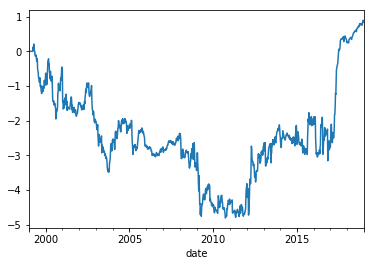

In [145]:
non_risk_adj_pf_returns.cumsum().plot.line()

In [139]:
(non_risk_adj_pf_returns+1).prod()

3.301051911885292e-06

In [142]:
non_risk_adj_weights.iloc[12][non_risk_adj_weights.iloc[12]>0]

PERMNO
10012    1.90366e-05
10039    0.000152293
10048    0.000550897
10092    0.000103601
10130    0.000505053
10147     0.00035169
10200    2.60297e-05
10259    9.44061e-05
10309    0.000305752
10346    0.000127429
10371    3.93683e-05
10398    4.19583e-05
10404    0.000165502
10422    2.56412e-05
10547    0.000105673
10624    9.37586e-05
10685    8.54706e-05
10706    4.89513e-05
10838     0.00107298
10984    7.38155e-05
10999    6.88945e-05
11082    2.71245e-05
11137    9.71257e-06
11157    0.000178711
11197    1.90366e-05
11347    0.000112666
11362    4.35123e-05
11381     0.00466096
11441    3.80733e-05
11456    0.000271952
            ...     
86318    0.000216007
86326    0.000607618
86328     0.00132946
86334    0.000130537
86356    9.97574e-05
86363    0.000198568
86388    0.000383323
86389    8.08085e-05
86414    0.000278168
86423    1.16551e-05
86436    0.000324788
86487    0.000462707
86519    0.000896664
86525    0.000422691
86527    0.000407151
86540    0.000422691
86544 

In [149]:
winners_simple_ret = (weekly_ret.shift(-1)*non_risk_adj_weights[non_risk_adj_weights>0]).sum(axis=1)
losers_simple_ret = (weekly_ret.shift(-1)*non_risk_adj_weights[non_risk_adj_weights<0]).sum(axis=1)
winners_log_ret =winners_simple_ret.apply(lambda x: np.log(1+x))
losers_log_ret =losers_simple_ret.apply(lambda x: np.log(1+x))

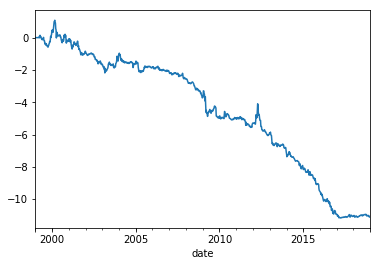

In [172]:
winners_log_ret.cumsum().plot.line()

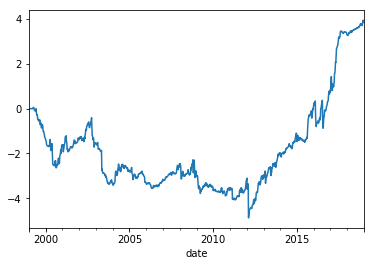

In [173]:
losers_log_ret.cumsum().plot.line()

In [177]:
equal_weights = pd.DataFrame(index=first.index, columns=first.columns)
for i in range(12,len(equal_weights)):
    equal_weights.iloc[i] = get_equal_weighted_momentum_weights(first.iloc[i-12:i])
equal_weights

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


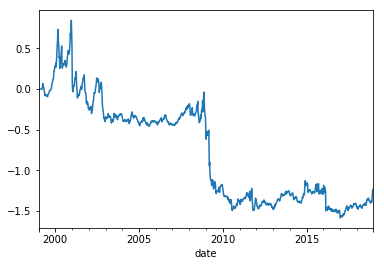

In [178]:
ew_pf_returns = (weekly_ret.shift(-1)*equal_weights).sum(axis=1)
ew_pf_log_returns = ew_pf_returns.apply(lambda x : np.log(1+x))
ew_pf_log_returns.cumsum().plot.line()

In [179]:
equal_weights.to_csv('equal_weights.csv')